In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
nx1 = 10 ** np.arange(2, 10)
print(nx1)

[       100       1000      10000     100000    1000000   10000000
  100000000 1000000000]


In [5]:
# 1D array scalar field on mistral
eps = 0 # to avoid issues with plotting on log scale

## 1D array on mistral, single thread

In [6]:
t_1D_fort = [eps, #100 (1e2)
             eps, #1000 (1e3)
             1e-4, #10000 (1e4)
             8.9999999999999998E-004, #100000 (1e5)
             3.2e-3, #1000000 (1e6)
             3.27e-2, #10000000 (1e7)
             0.3236, #100000000 (1e8)
             1.1973e+00, #1000000000 (1e9)
            ]

In [7]:
t_1D_cffi = [4.5000e-04, #100 (1e2)
             4.2333e-04, #1000 (1e3)
             4.4e-4, #10000 (1e4)
             1.47e-3, #100000 (1e5)
             2.9500e-03, #1000000 (1e6)
             3.7697e-02, #10000000 (1e7)
             3.6413e-01, #100000000 (1e8)
             3.6279, #1000000000 (1e9)
            ]

In [8]:
t_1D_pipe = [6.3334e-05, #100 (1e2)
             5.6667e-05, #1000 (1e3)
             9e-5, #10000 (1e4)
             1.05e-3, #100000 (1e5)
             1.0197e-02, #1000000 (1e6)
             1.3452e-01, #10000000 (1e7)
             1.3566e+00, #100000000 (1e8)
             None, #1000000000 (1e9)
            ]

In [9]:
t_1D_mpi2 = [4.2e-3, #100 (1e2)
             1.7e-2, #1000 (1e3)
             7.0999999999999995E-003, #10000 (1e4)
             0.318299, #100000 (1e5)
             0.1283, #1000000 (1e6)
             1.286, #10000000 (1e7)
             12.87, #100000000 (1e8)
             None, #1000000000 (1e9)
            ]

In [10]:
# mpi but all on the same node
t_1D_mpi1 = [None, #100 (1e2)
             None, #1000 (1e3)
             None, #10000 (1e4)
             None, #100000 (1e5)
             None, #1000000 (1e6)
             None, #10000000 (1e7)
             1.216, #100000000 (1e8)
             15.2396, #1000000000 (1e9)
            ]

In [11]:
df = pd.DataFrame(dict(nx1=nx1,
                       t_1D_fort=t_1D_fort,
                       t_1D_cffi=t_1D_cffi,
                       t_1D_pipe=t_1D_pipe,
                       t_1D_mpi2=t_1D_mpi2,
                       t_1D_mpi1=t_1D_mpi1))

In [12]:
sns.set_context('talk')
sns.set_style('ticks')

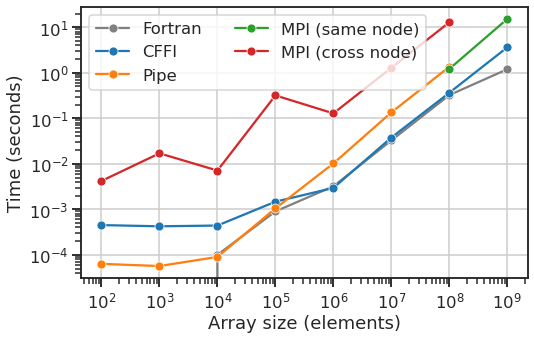

In [13]:
fig, ax= plt.subplots(1,1,figsize=(8,5))

sns.lineplot(data=df, x='nx1', y='t_1D_fort', label='Fortran', marker='o', color='gray', ax=ax)
sns.lineplot(data=df, x='nx1', y='t_1D_cffi', label='CFFI', marker='o', ax=ax)
sns.lineplot(data=df, x='nx1', y='t_1D_pipe', label='Pipe', marker='o', ax=ax)
sns.lineplot(data=df, x='nx1', y='t_1D_mpi1', label='MPI (same node)', marker='o', ax=ax)
sns.lineplot(data=df, x='nx1', y='t_1D_mpi2', label='MPI (cross node)', marker='o', ax=ax)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Array size (elements)')
ax.set_ylabel('Time (seconds)')

ax.legend(ncol=2)

ax.grid()
plt.savefig('./plot_stage1_timing.png', dpi=150, bbox_inches='tight')
plt.show()

In [14]:
df.to_csv('timings_stage1.csv')

## 1D array on mistral, MPI with 4 nodes à 2 tasks

In [15]:
t_1D_mpi_cffi = [3.6e-4, #100 (1e2)
             3.4e-4, #1000 (1e3)
             3.8667e-04, #10000 (1e4)
             1.2400e-03, #100000 (1e5)
             None, #1000000 (1e6)
             None, #10000000 (1e7)
             None, #100000000 (1e8)
             None, #1000000000 (1e9)
            ]

In [16]:
t_1D_mpi_pipe = [5e-05, #100 (1e2)
             5.7e-5, #1000 (1e3)
             9.3333e-05, #10000 (1e4)
             9.4667e-04, #100000 (1e5)
             None, #1000000 (1e6)
             None, #10000000 (1e7)
             None, #100000000 (1e8)
             None, #1000000000 (1e9)
            ]

<AxesSubplot:>

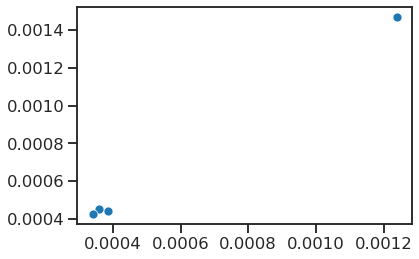

In [17]:
sns.scatterplot(x=t_1D_mpi_cffi, y=t_1D_cffi)


In [18]:

df['t_1D_mpi_cffi'] = t_1D_mpi_cffi
df['t_1D_mpi_pipe'] = t_1D_mpi_pipe

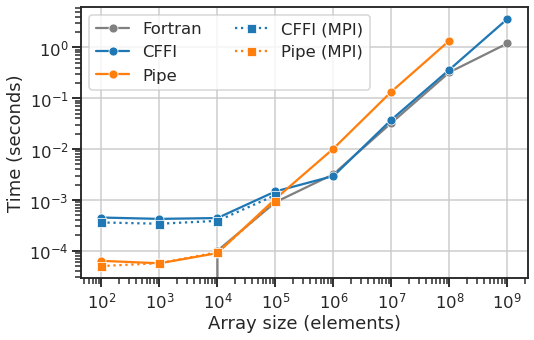

In [19]:
fig, ax= plt.subplots(1,1,figsize=(8,5))

sns.lineplot(data=df, x='nx1', y='t_1D_fort', label='Fortran', marker='o', color='gray', ax=ax)
sns.lineplot(data=df, x='nx1', y='t_1D_cffi', label='CFFI', marker='o', color='C0', ax=ax)
sns.lineplot(data=df, x='nx1', y='t_1D_pipe', label='Pipe', marker='o', color='C1', ax=ax)
sns.lineplot(data=df, x='nx1', y='t_1D_mpi_cffi', label='CFFI (MPI)', marker='s', color='C0', linestyle=':', ax=ax)
sns.lineplot(data=df, x='nx1', y='t_1D_mpi_pipe', label='Pipe (MPI)', marker='s', color='C1', linestyle=':', ax=ax)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('Array size (elements)')
ax.set_ylabel('Time (seconds)')

ax.legend(ncol=2)

ax.grid()
plt.savefig('./plot_stage1b_timing.png', dpi=150, bbox_inches='tight')
plt.show()